# exploring the data

In [83]:
library(e1071)   
library(psych)
library(tidyverse)
library(ggplot2)
library(gridExtra)
library(cowplot)

In [81]:
# install.packages("cowplot")

Installing package into ‘/home/valentin/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



In [2]:
data <- read.csv("../Data/sperformance-dataset.csv", na.strings=c("na"," ","",".","NA"), header = TRUE)

In [3]:
head(data)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel.p,freetime.p,goout.p,Dalc.p,Walc.p,health.p,absences.p,pG1,pG2,pG3
,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,15,R,GT3,T,1,1,at_home,other,⋯,3,1,2,1,1,1,4,13,13,13
2,GP,F,15,R,GT3,T,1,1,other,other,⋯,3,3,4,2,4,5,2,13,11,11
3,GP,F,15,R,GT3,T,2,2,at_home,other,⋯,4,3,1,1,1,2,8,14,13,12
4,GP,F,15,R,GT3,T,2,4,services,health,⋯,4,3,2,1,1,5,2,10,11,10
5,GP,F,15,R,GT3,T,3,3,services,services,⋯,4,2,1,2,3,3,2,13,13,13
6,GP,F,15,R,GT3,T,3,4,services,health,⋯,4,3,2,1,1,5,2,11,12,12


In [4]:
summary(data)

 school   sex          age        address famsize   Pstatus      Medu      
 GP:342   F:198   Min.   :15.00   R: 81   GT3:278   A: 38   Min.   :0.000  
 MS: 40   M:184   1st Qu.:16.00   U:301   LE3:104   T:344   1st Qu.:2.000  
                  Median :17.00                             Median :3.000  
                  Mean   :16.59                             Mean   :2.806  
                  3rd Qu.:17.00                             3rd Qu.:4.000  
                  Max.   :22.00                             Max.   :4.000  
      Fedu             Mjob           Fjob            reason    nursery  
 Min.   :0.000   at_home : 53   at_home : 16   course    :140   no : 72  
 1st Qu.:2.000   health  : 33   health  : 17   home      :110   yes:310  
 Median :3.000   other   :138   other   :211   other     : 34            
 Mean   :2.565   services: 96   services:107   reputation: 98            
 3rd Qu.:4.000   teacher : 62   teacher : 31                             
 Max.   :4.000          

In [5]:
data

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel.p,freetime.p,goout.p,Dalc.p,Walc.p,health.p,absences.p,pG1,pG2,pG3
<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GP,F,15,R,GT3,T,1,1,at_home,other,⋯,3,1,2,1,1,1,4,13,13,13
GP,F,15,R,GT3,T,1,1,other,other,⋯,3,3,4,2,4,5,2,13,11,11
GP,F,15,R,GT3,T,2,2,at_home,other,⋯,4,3,1,1,1,2,8,14,13,12
GP,F,15,R,GT3,T,2,4,services,health,⋯,4,3,2,1,1,5,2,10,11,10
GP,F,15,R,GT3,T,3,3,services,services,⋯,4,2,1,2,3,3,2,13,13,13
GP,F,15,R,GT3,T,3,4,services,health,⋯,4,3,2,1,1,5,2,11,12,12
GP,F,15,R,GT3,T,3,4,services,teacher,⋯,4,2,2,2,2,5,0,10,11,12
GP,F,15,R,LE3,T,2,2,health,services,⋯,4,1,3,1,3,4,0,11,10,11
GP,F,15,R,LE3,T,3,1,other,other,⋯,4,4,2,2,3,3,6,15,15,15


In [6]:
IQR(data$age)

[1] 1

In [7]:
range(data$age)

[1] 15 22

In [8]:
calculate_range <- function(data){
    max(data) - min(data)
}

In [9]:
calculate_range(data$age)

[1] 7

In [10]:
# building statistical informations dataframe for each variable
#test <- data.frame(min(data$age),max(data$age),calculate_range(data$age),mean(data$age),median(data$age)
#                   ,sd(data$age),skewness(data$age),kurtosis(data$age), IQR())

In [11]:
# Better form of summary statisitcs in R usinf the psych library
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
school*,1,382,1.1047120,0.3065836,1.0,1.00653595,0.0000,1,2,1,2.57191324,4.62687046,0.01568618
sex*,2,382,1.4816754,0.5003194,1.0,1.47712418,0.0000,1,2,1,0.07305988,-1.99987699,0.02559857
age,3,382,16.5863874,1.1734701,17.0,16.55228758,1.4826,15,22,7,0.39534082,0.06484472,0.06003995
address*,4,382,1.7879581,0.4092904,2.0,1.85947712,0.0000,1,2,1,-1.40342543,-0.03045624,0.02094112
famsize*,5,382,1.2722513,0.4457023,1.0,1.21568627,0.0000,1,2,1,1.01930135,-0.96352654,0.02280411
Pstatus*,6,382,1.9005236,0.2996932,2.0,2.00000000,0.0000,1,2,1,-2.66589369,5.12041391,0.01533364
Medu,7,382,2.8062827,1.0863806,3.0,2.89215686,1.4826,0,4,4,-0.38363313,-1.03679162,0.05558407
Fedu,8,382,2.5654450,1.0962401,3.0,2.58823529,1.4826,0,4,4,-0.09488759,-1.21888674,0.05608853
Mjob*,9,382,3.2120419,1.2250926,3.0,3.26470588,1.4826,1,5,4,-0.33086828,-0.66283545,0.06268119


In [12]:
data_types <- read.csv("../Data/datatypes.csv", skip =1)

In [13]:
data_types

Variable,Description,Type
<fct>,<fct>,<fct>
sex,student’s sex,binary: female or male
age,student’s age,numeric: from 15 to 22
school,student’s school,binary: Gabriel Pereira or Mousinho da Silveira
address,student’s home address type,binary: urban or rural
Pstatus,parent’s cohabitation status,binary: living together or apart
Medu,mother’s education,numeric: from 0 to 4
Mjob,mother’s job,nominal
Fedu,father’s education,numeric: from 0 to 4
Fjob,father’s job,nominal


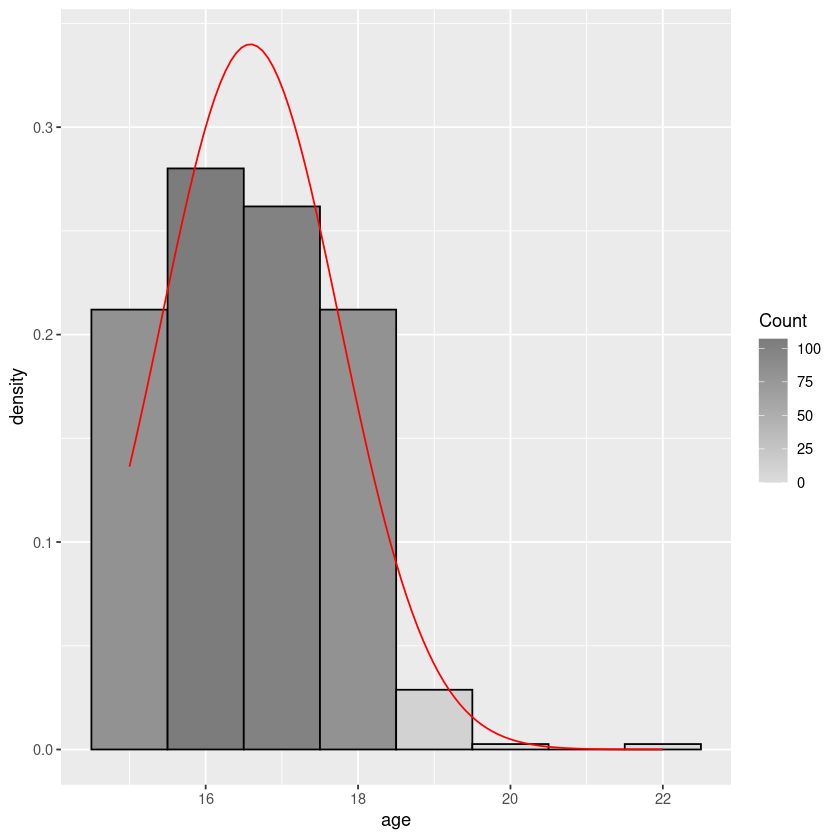

In [34]:
# Distribution graphs
gg<-ggplot(data,aes(age))
gg<-gg+labs(x="age")
gg<-gg+geom_histogram(binwidth=1, colour="black", aes(y=..density.., fill=..count..))
gg<-gg+scale_fill_gradient("Count", low="#DCDCDC", high="#7C7C7C")
gg<-gg+stat_function(fun=dnorm, color="red",args=list(mean=mean(data$age, na.rm=TRUE), sd=sd(data$age, na.rm=TRUE)))
gg

In [127]:
# plotting for key variables of interest
col_names = c("absences.m" , "absences.p", "pG1","pG2","pG3","mG1","mG2","mG3")

In [128]:
# hold all the plots created in the loop
plot_list <- list()
for(i in col_names){
    print(mean(data[,i]))
    gg <- ggplot(data , aes_string(i))  
    gg <- gg + geom_histogram(binwidth=1, colour="black", aes(y=..density.., fill=..count..))
    gg<-gg+scale_fill_gradient("Count", low="#DCDCDC", high="#7C7C7C")
    gg<-gg+stat_function(fun=dnorm, color="red",args=list(mean=mean(data[,i], na.rm=TRUE), sd=sd(data[,i], na.rm=TRUE)))
    plot_list[[i]] <- gg
} # end of loop

logical(0)

[1] 5.319372
[1] 3.672775
[1] 12.11257
[1] 12.23822
[1] 12.51571
[1] 10.86126
[1] 10.71204
[1] 10.38743


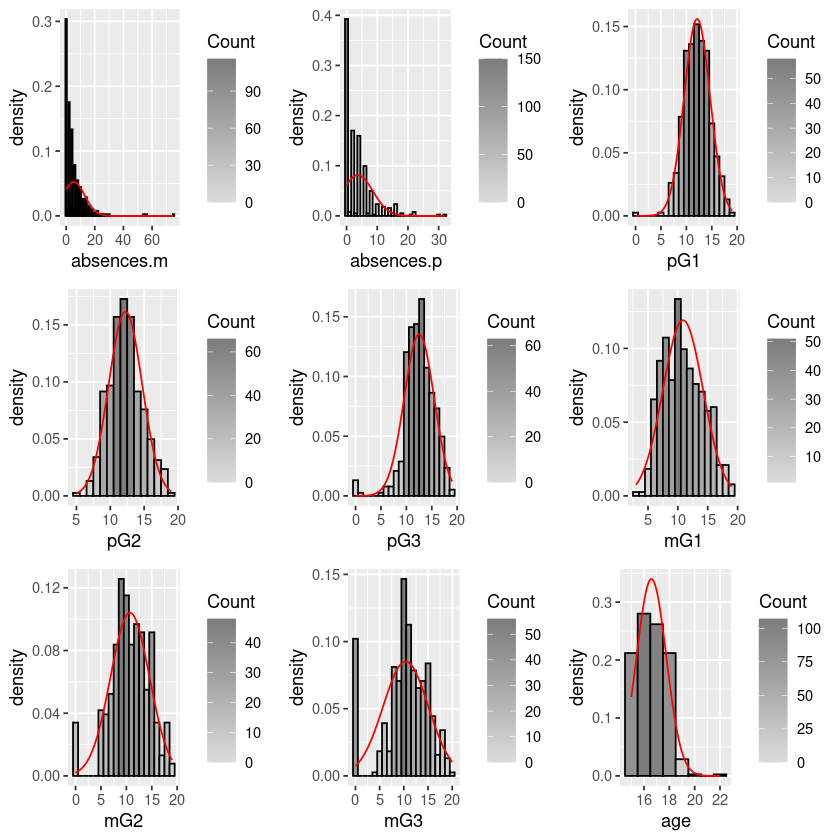

In [125]:
plot_grid(plotlist = plot_list)

In [139]:

# hold all theplots created in the loop
box_plot_list <- list()
for(i in col_names){
    print(i)
    gg <- ggplot(data, aes_string(y=i)) + geom_boxplot() + theme(text = element_text(size=20))
    box_plot_list[[i]] <- gg
} # end of loop

[1] "absences.m"
[1] "absences.p"
[1] "pG1"
[1] "pG2"
[1] "pG3"
[1] "mG1"
[1] "mG2"
[1] "mG3"


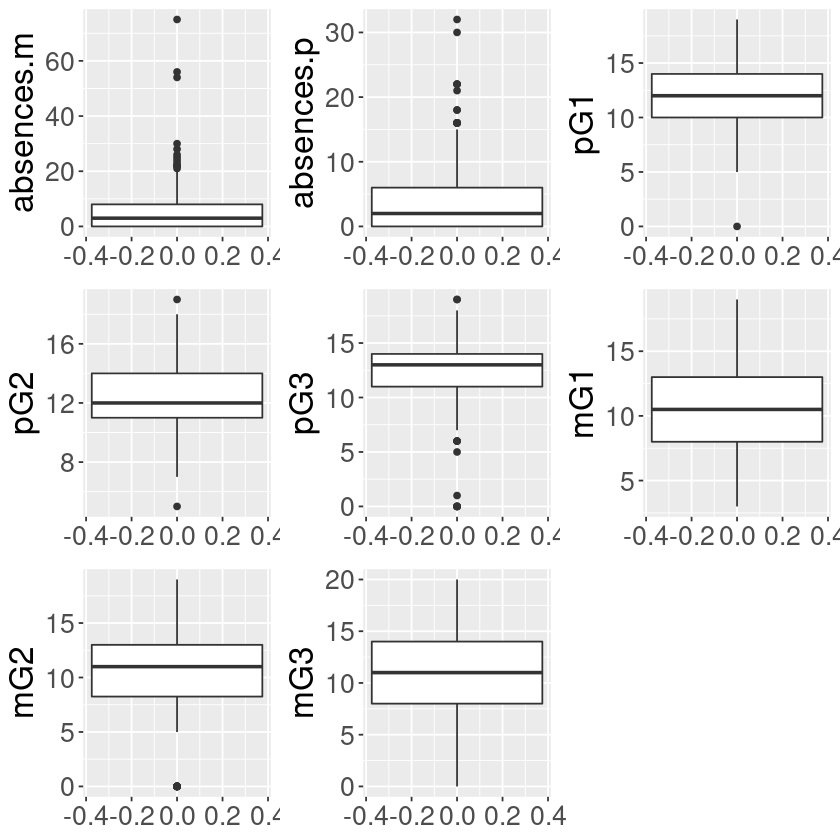

In [140]:
plot_grid(plotlist = box_plot_list)

In [146]:
# Categorical data description
cat_data <- data[,-which(names(data) %in% c("absences.m" , "absences.p", "pG1","pG2","pG3","mG1","mG2","mG3"))]

In [147]:
head(cat_data)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,paid.p,activities.p,higher.p,romantic.p,famrel.p,freetime.p,goout.p,Dalc.p,Walc.p,health.p
,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,15,R,GT3,T,1,1,at_home,other,⋯,yes,yes,yes,no,3,1,2,1,1,1
2,GP,F,15,R,GT3,T,1,1,other,other,⋯,no,no,yes,yes,3,3,4,2,4,5
3,GP,F,15,R,GT3,T,2,2,at_home,other,⋯,no,yes,yes,no,4,3,1,1,1,2
4,GP,F,15,R,GT3,T,2,4,services,health,⋯,no,yes,yes,no,4,3,2,1,1,5
5,GP,F,15,R,GT3,T,3,3,services,services,⋯,yes,yes,yes,yes,4,2,1,2,3,3
6,GP,F,15,R,GT3,T,3,4,services,health,⋯,no,yes,yes,no,4,3,2,1,1,5


In [151]:
colnames(cat_data)

[1] "school"       "sex"          "age"          "address"      "famsize"     
 [6] "Pstatus"      "Medu"         "Fedu"         "Mjob"         "Fjob"        
[11] "reason"       "nursery"      "internet"     "guardian.m"   "traveltime.m"
[16] "studytime.m"  "failures.m"   "schoolsup.m"  "famsup.m"     "paid.m"      
[21] "activities.m" "higher.m"     "romantic.m"   "famrel.m"     "freetime.m"  
[26] "goout.m"      "Dalc.m"       "Walc.m"       "health.m"     "guardian.p"  
[31] "traveltime.p" "studytime.p"  "failures.p"   "schoolsup.p"  "famsup.p"    
[36] "paid.p"       "activities.p" "higher.p"     "romantic.p"   "famrel.p"    
[41] "freetime.p"   "goout.p"      "Dalc.p"       "Walc.p"       "health.p"

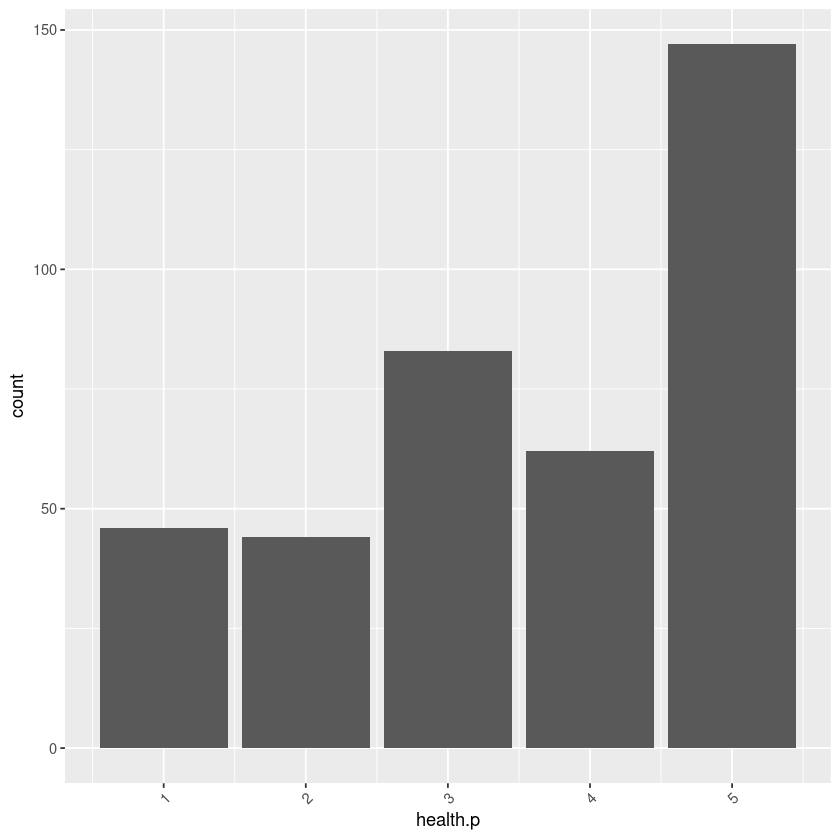

In [163]:
ggplot(cat_data, aes(x = `health.p`)) +
        geom_bar() +
        theme(axis.text.x = element_text(angle = 45, hjust = 1))


In [179]:
# Categorical data barcharts
bar_cat_plot_list <- list()
col_names <- colnames(cat_data)
for(i in col_names){
#     print(i)
    gg <- ggplot(cat_data, aes_string(x = i)) + geom_bar() + theme(axis.text.x = element_text(angle = 45, hjust = 1, size=5))
    bar_cat_plot_list[[i]] <- gg
} # end of loop

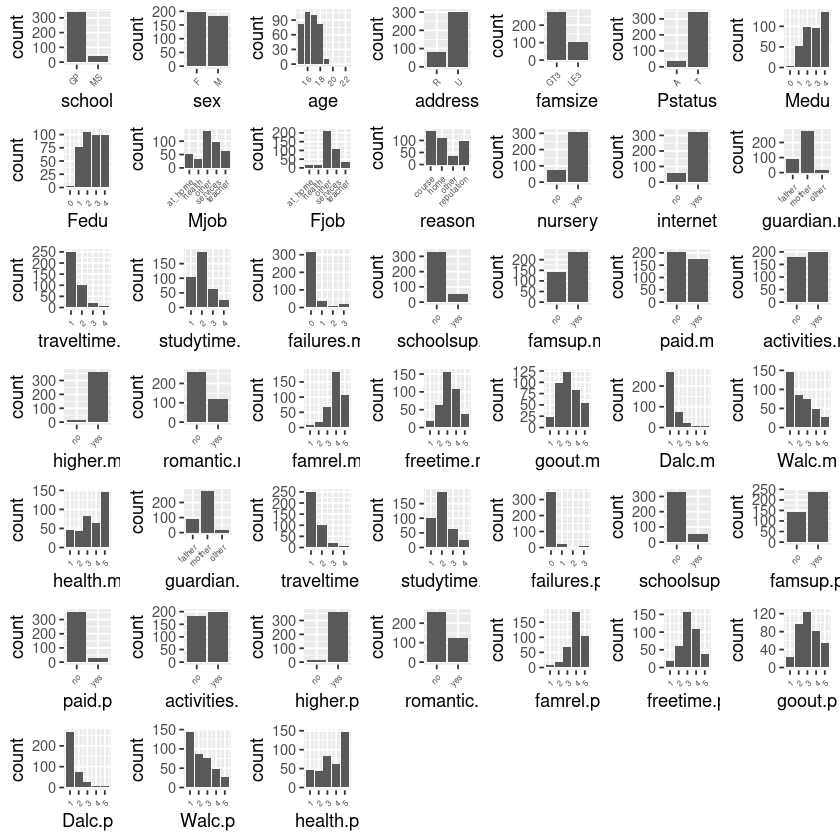

In [180]:
plot_grid(plotlist = bar_cat_plot_list)